In [37]:
#Let's just put these into a h5 file

import h5py
import pyNSID
import sys
sys.path.insert(0, '/Users/rvv/Github/DTMicroscope')
import DTMicroscope
from DTMicroscope.base.afm import AFM_Microscope as AFM
import numpy as np
from IPython.display import clear_output, display

In [2]:
new_h5_filename = r'/Users/rvv/Github/stm_datasets_redone3.h5'
afm = AFM(data_path=new_h5_filename)

In [27]:
afm.data_dict['Single_Datasets'].keys()

dict_keys(['Single_Dataset_0', 'Single_Dataset_1', 'Single_Dataset_2', 'Single_Dataset_3'])

In [4]:
afm.setup_microscope('Compound_Dataset_1') #need to see how to work this thing

compound dataset detected! We will use the spectroscopic dataset to start
You don't have any x and y coordinates! Using defaults
finished processing dataset


In [5]:
#general information about the uploaded dataset
afm.get_dataset_info()

[('channels',
  ['Channel_0',
   'Channel_1',
   'Channel_2',
   'Channel_3',
   'Channel_4',
   'Channel_5',
   'Channel_6',
   'Channel_7',
   'Channel_8',
   'Channel_9',
   'Channel_10',
   'Channel_11']),
 ('signals',
  ['Current',
   'Current',
   'Vert.',
   'Excitation',
   'X',
   'Y',
   'Z',
   'Excitation',
   'Current',
   'X',
   'Y',
   'Z']),
 ('units',
  ['A', 'A', '[bwd] (V', 'V', 'm', 'm', 'm', 'V', 'A', 'm', 'm', 'm']),
 ('scans', []),
 ('spectra', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]),
 ('point_clouds', [])]

In [6]:
#Get the current tip position
afm.x, afm.y

(0.5102040816326531, 0.5102040816326531)

In [7]:
_point_coords = np.array([afm.x_coords, afm.y_coords]).T


In [22]:
#Let's see if we can get the spectral data
(_spec_dim, _y) = afm.get_spectrum(location=None, channel='Channel_2')

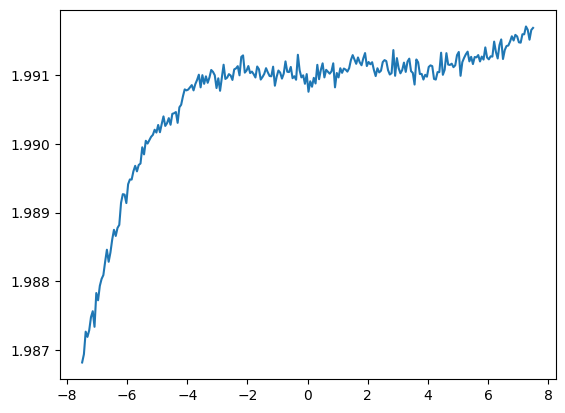

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(_spec_dim, _y)

In [24]:
#let's change the dataset
afm.setup_microscope('Single_Dataset_0') #

You don't have any x and y coordinates! Using defaults
finished processing dataset


In [28]:
#general information about the uploaded dataset
afm.get_dataset_info()

[('channels',
  ['Channel_0',
   'Channel_1',
   'Channel_2',
   'Channel_3',
   'Channel_4',
   'Channel_5',
   'Channel_6',
   'Channel_7',
   'Channel_8',
   'Channel_9',
   'Channel_10',
   'Channel_11',
   'Channel_12',
   'Channel_13',
   'Channel_14']),
 ('signals',
  ['Z',
   'Z',
   'Z',
   'OC_M1_Freq._Shift',
   'OC_M1_Freq._Shift',
   'OC_M1_Excitation',
   'OC_M1_Excitation',
   'Bias',
   'Bias',
   'Current',
   'Current',
   'OC_D1_Phase',
   'OC_D1_Phase',
   'OC_D1_Amplitude',
   'OC_D1_Amplitude']),
 ('units',
  ['m',
   'm',
   'm',
   'Hz',
   'Hz',
   'V',
   'V',
   'V',
   'V',
   'A',
   'A',
   'deg',
   'deg',
   'm',
   'm']),
 ('scans', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ('spectra', []),
 ('point_clouds', [])]

In [31]:
# The required channels can be specified using either the 'signal' or 'channels' values (see above).
dat = afm.get_scan(channels=['Channel_0','Channel_3'])

In [32]:
dat.shape

(2, 512, 512)

Text(0.5, 1.0, 'image_dataset_1')

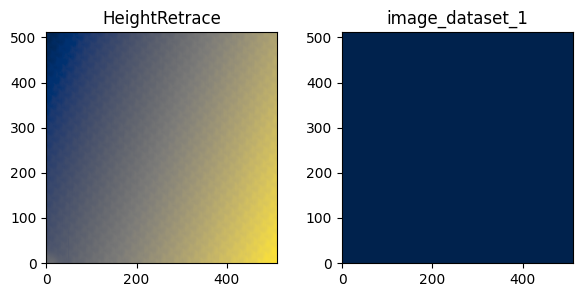

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].imshow(dat[0].T, cmap='cividis', origin='lower')
ax[0].set_title('HeightRetrace')
ax[1].imshow(dat[1].T, cmap='cividis', origin='lower')
ax[1].set_title('image_dataset_1')

Line 511


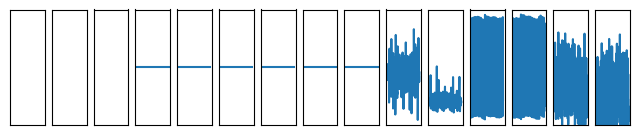

StopIteration: 

In [38]:
gen = afm.scanning_emulator(scan_rate=5)
k = 0

print(f'Line {k}')
line = next(gen)
fig, ax = plt.subplots(1, len(line), figsize=(8,1.5))
for i, ax_ in enumerate(ax):
    ax_.plot(np.arange(len(line[i])), line[i])
    ax_.set_xticks([])
    ax_.set_yticks([])
plt.ion()  # Enable interactive mode
plt.show()
k += 1

while True:   
    line = next(gen)
    for i, ax_ in enumerate(ax):
        ax_.lines[0].set_data(np.arange(len(line[i])), line[i])
    
    clear_output(wait=True)
    print(f'Line {k}')
    display(fig)
    
    k += 1